<a href="https://colab.research.google.com/github/amanullahshah32/CSE327_Software_Engineering/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [7]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [8]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check the PyThon version
torch.__version__

'2.3.0+cu121'

## 1. **Data (Preparing and loading)**

In [9]:
 # Create known parameters
 weight = 0.7
 bias = .3

 # create data
 start = 0
 end = 1
 step = 0.02

 X = torch.arange(start, end, step).unsqueeze(dim=1) #; this is asumed as feature
 y = weight * X + bias

In [10]:
X[:10], y[:10], X.shape==y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 True)

### **Split data into training and test sets**

In [11]:
# Create train/test split
train_split = int(0.8 * len(X)) # 800% data used for training set, 20% data for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Visualization

In [19]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=8, label='Training data', marker='D')

  # plot test data in red
  plt.scatter(test_data, test_labels, c='g', s=8, label = "Testing data", marker = 'o')

  if predictions is not None:
    #plot the predictions in green (predicitons were made on the test data)
    plt.scatter(test_data, predictions, c='r', s=8, label = "predictions")

    #Show the legend
  #plt.legend(prop={"size":14});
  plt.legend()

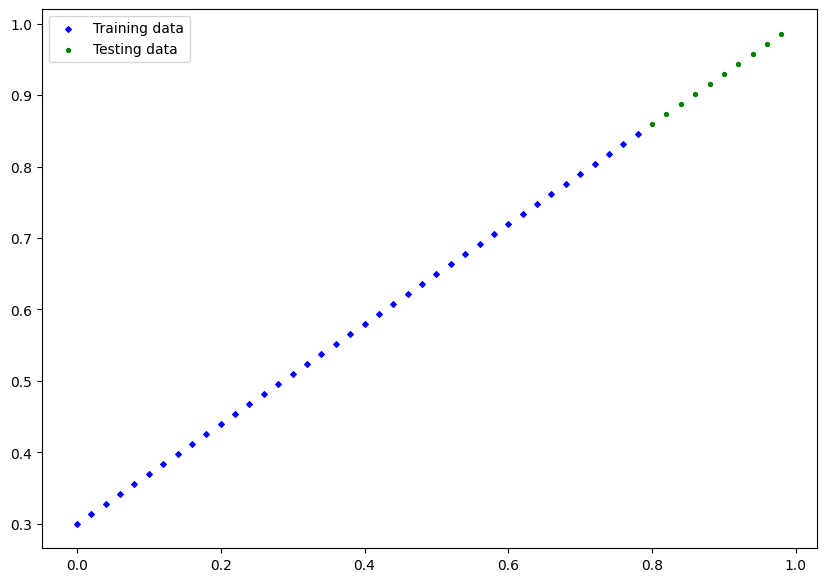

In [20]:
plot_prediction();

## **2. Build Model**

#### Let's replicate a standard linear regression model using pure PyTorch.

In [21]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorchis a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    """

    Args:
      self:
    """
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #start with random weights (this will get adjusted as the module learns)
                                            dtype= torch.float), # <- PyTorch loves float32 by default
                                            requires_grad= True) # can we update this values with gradient descent?)
    self.bias = nn.Parameter(torch.randn(1, # start with rnadom bias (this will get adjusted as the model learns)
                                         dtype= torch.float32), #pytorch loves float 32 as default
                             requires_grad= True) # can we update this value with gradient descent?
  # Forward defines the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data (e.g. training/testing features)
    return self.weights * x + self.bias # this is the linear regression formula (y=mx+c)